#  The Sparks foundation Task-1

Importing all the library which will be needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the Data and make a dataframe

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print(df.shape)
df.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To check linearity in the data, Plot the scatter plot 

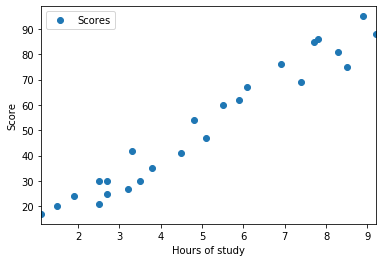

In [3]:
%matplotlib inline
df.plot(x="Hours", y="Scores", style='o')
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.show()

yes, our data has lineariry so we can apply linear regression model to our Data. Here we have single variable so that we use simple linear regression.

Before spliting the data reshape, convert into array (Give reason) and store data in X and Y varible 

In [4]:
x=np.array(df['Hours']).reshape(-1,1)
y=np.array(df['Scores']).reshape(-1,1)
print('Hours =\n',x)
print('Score =\n',y)

Hours =
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Score =
 [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


## Split the Data

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=101)
print("Training Data")
print('X train=\n',xtrain)
print('Y train=\n',ytrain)

Training Data
X train=
 [[4.8]
 [3.2]
 [8.5]
 [5.1]
 [1.1]
 [6.1]
 [2.5]
 [4.5]
 [1.5]
 [6.9]
 [2.7]
 [3.5]
 [8.3]
 [3.3]
 [2.7]
 [8.9]
 [7.8]
 [9.2]
 [1.9]
 [5.9]]
Y train=
 [[54]
 [27]
 [75]
 [47]
 [17]
 [67]
 [21]
 [41]
 [20]
 [76]
 [30]
 [30]
 [81]
 [42]
 [25]
 [95]
 [86]
 [88]
 [24]
 [62]]


## Training the Model

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
print('Training completed')

Training completed


## Visualisation on Trained Model

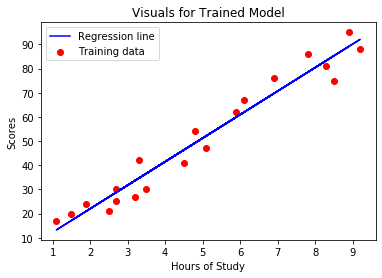

In [7]:
plt.scatter(xtrain, ytrain, color='red', label='Training data')
plt.plot(xtrain,regressor.predict(xtrain), color='blue', label='Regression line')
plt.title('Visuals for Trained Model')
plt.xlabel("Hours of Study")
plt.ylabel('Scores')
plt.legend()
plt.show()

## Visualisation on Testing Data

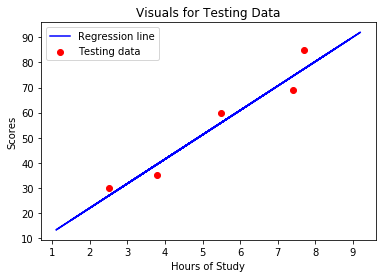

In [8]:
plt.scatter(xtest, ytest, color='red', label='Testing data')
plt.plot(xtrain,regressor.predict(xtrain), color='blue', label='Regression line')
plt.title('Visuals for Testing Data')
plt.xlabel("Hours of Study")
plt.ylabel('Scores')
plt.legend()
plt.show()

### Making predictions

In [9]:
ypred= regressor.predict(xtest)
print('xtest value=\n',xtest)
print('Absolute value=\n',ytest)
print('Predicted value=\n',ypred) 

xtest value=
 [[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]
Absolute value=
 [[30]
 [85]
 [35]
 [69]
 [60]]
Predicted value=
 [[26.84539693]
 [77.45859361]
 [39.4986961 ]
 [74.53860149]
 [56.04531809]]


What will be predicted score if a student studies for 9.25 hrs/ day?

In [10]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.54521954]


## Evaluating  Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

### R-score value

In [11]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.9377551740781869

### Error

In [12]:
from sklearn import metrics
print('MAE=',metrics.mean_absolute_error(ytest,ypred),'(Mean absolute error)')
print('MSE',metrics.mean_squared_error(ytest,ypred),'(Mean squared error)')
print('RMSE',np.sqrt(metrics.mean_squared_error(ytest,ypred)),'(Root mean squared error)')

MAE= 4.937597792467705 (Mean absolute error)
MSE 26.675642597052235 (Mean squared error)
RMSE 5.164846812544612 (Root mean squared error)
